In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/mac/Documents/dataframe1.csv',header=0,parse_dates=[0])

In [3]:
df.head()

,DATE,H1
0,2019-11-01,16.0
1,2019-11-02,21.0
2,2019-11-03,17.0
3,2019-11-04,12.0
4,2019-11-05,26.0


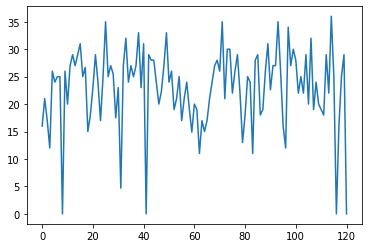

In [13]:
df['H1'].plot()

In [4]:
df.shape

(121, 2)

In [6]:
train = df.H1[1:101]


In [9]:
test = df.H1[101:]

In [10]:

test.shape

(20,)

In [11]:
train.shape

(100,)

In [95]:
train, test = df.H1[1:df.shape[0]-15], df.H1[df.shape[0]-15:df.shape[0]-5]

In [96]:
train.head()

1    21.0
2    17.0
3    12.0
4    26.0
5    24.0
Name: H1, dtype: float64

In [97]:
train.shape

(105,)

In [15]:
from statsmodels.tsa.ar_model import AR

In [16]:
model = AR(train)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [17]:
model_fit = model.fit()

### No. of lag variables

In [18]:
model_fit.k_ar

12

### Coef of lag variables

In [19]:
model_fit.params

const     24.331689
L1.H1      0.129434
L2.H1      0.011061
L3.H1     -0.028489
L4.H1      0.110406
L5.H1      0.030527
L6.H1     -0.152524
L7.H1     -0.063694
L8.H1     -0.004453
L9.H1     -0.136464
L10.H1     0.089354
L11.H1     0.029043
L12.H1    -0.042632
dtype: float64

In [20]:
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [21]:
predictions

101    25.449123
102    25.591415
103    24.455333
104    24.730302
105    23.346785
106    20.019737
107    23.179167
108    23.510670
109    23.114313
110    23.151842
111    23.155360
112    24.073851
113    23.868094
114    23.780890
115    24.154782
116    23.547298
117    23.678875
118    23.839449
119    23.724874
120    23.651962
dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test,predictions)
mse

82.11297248548945

In [106]:
from matplotlib import pyplot

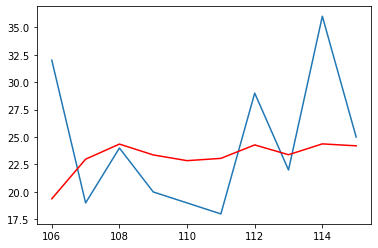

In [107]:
pyplot.plot(test_y)
pyplot.plot(predictions,color='red')